In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("water_data.csv")   # <-- now uses your file
print("Shape of dataset:", df.shape)
display(df.head())

Shape of dataset: (20, 10)


,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.0,204,15000,7.0,330,420,12,65,3.5,1
1,8.1,180,18000,8.1,340,460,14,72,4.2,0
2,6.5,150,12000,6.5,310,390,10,55,2.8,1
3,7.2,210,17000,7.2,335,430,15,68,3.9,1
4,7.8,190,16000,7.8,325,410,11,70,4.0,0



--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pH               20 non-null     float64
 1   Hardness         20 non-null     int64  
 2   Solids           20 non-null     int64  
 3   Chloramines      20 non-null     float64
 4   Sulfate          20 non-null     int64  
 5   Conductivity     20 non-null     int64  
 6   Organic_carbon   20 non-null     int64  
 7   Trihalomethanes  20 non-null     int64  
 8   Turbidity        20 non-null     float64
 9   Potability       20 non-null     int64  
dtypes: float64(3), int64(7)
memory usage: 1.7 KB
None

--- Missing Values ---
pH                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

--- Statistical Summar

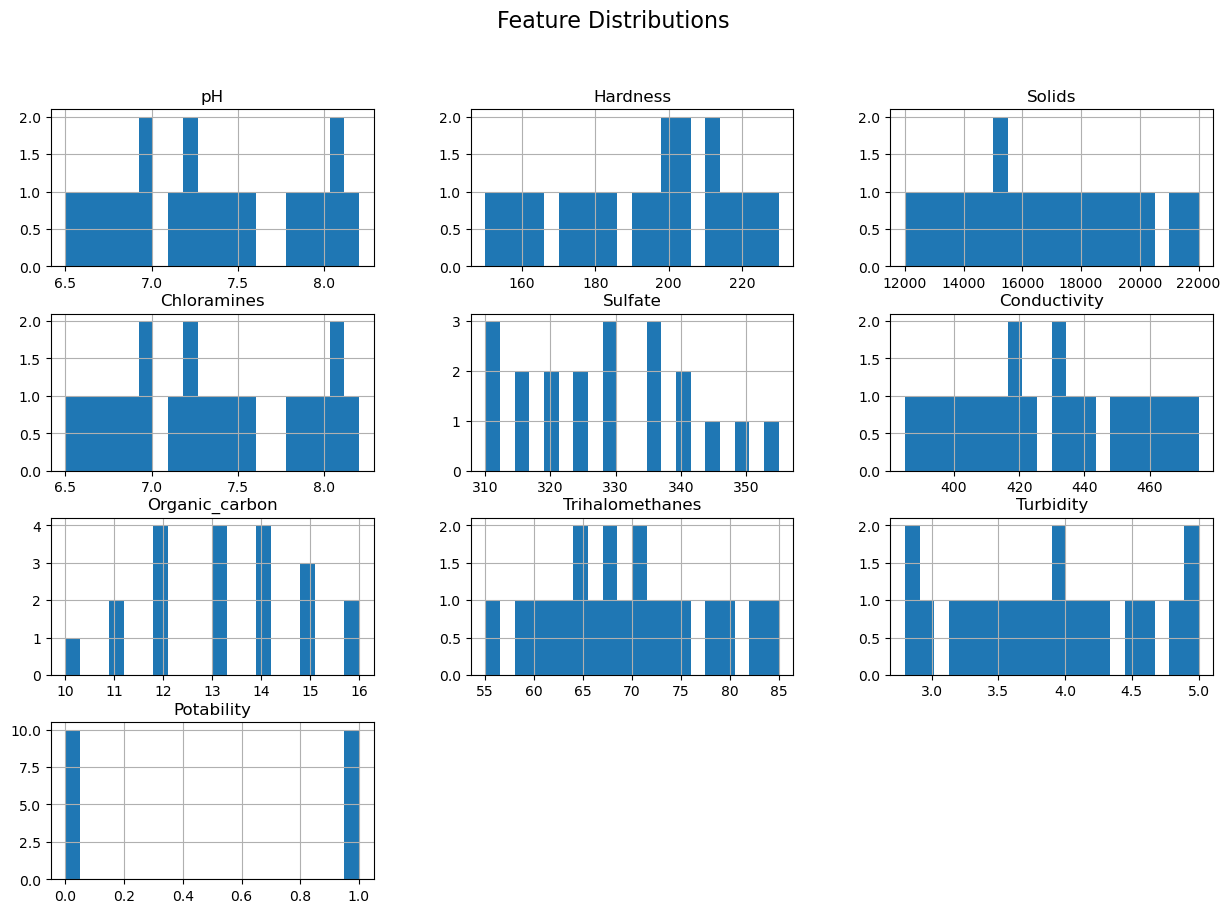

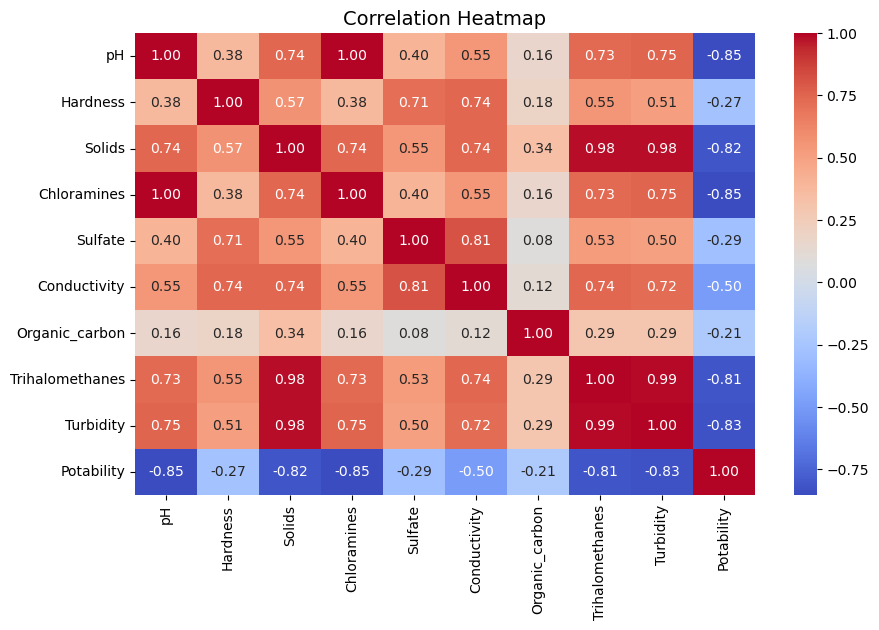

In [3]:
print("\n--- Basic Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Statistical Summary ---")
print(df.describe())

# Plot distributions of each feature
df.hist(bins=20, figsize=(15,10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [4]:
# Handle missing values (if any)
df = df.fillna(df.mean(numeric_only=True))

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop("Potability", axis=1))

# Create scaled dataframe
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled["Potability"] = df["Potability"]

print("\n--- Scaled Data Sample ---")
display(df_scaled.head())


--- Scaled Data Sample ---


,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.662147,0.507810,-0.531995,-0.662147,0.095959,-0.329617,-0.762493,-0.533573,-0.572619,1
1,1.449046,-0.525024,0.531995,1.449046,0.863630,1.177204,0.457496,0.355715,0.496270,0
2,-1.621779,-1.816066,-1.595986,-1.621779,-1.439383,-1.459733,-1.982481,-1.803984,-1.641508,1
3,-0.278294,0.766018,0.177332,-0.278294,0.479794,0.047088,1.067490,-0.152449,0.038175,1
4,0.873266,-0.094676,-0.177332,0.873266,-0.287877,-0.706322,-1.372487,0.101633,0.190873,0



--- Feature Scores (SelectKBest) ---
           Feature      Score
0               pH  48.528931
3      Chloramines  48.528931
8        Turbidity  40.549488
2           Solids  35.796992
7  Trihalomethanes  35.108571
5     Conductivity   5.972360
4          Sulfate   1.626506
1         Hardness   1.428069
6   Organic_carbon   0.859649

--- Feature Importance (RandomForest) ---
           Feature  Importance
0               pH    0.277600
3      Chloramines    0.251418
7  Trihalomethanes    0.207211
2           Solids    0.125608
8        Turbidity    0.118711
4          Sulfate    0.011306
5     Conductivity    0.006957
6   Organic_carbon    0.001190
1         Hardness    0.000000


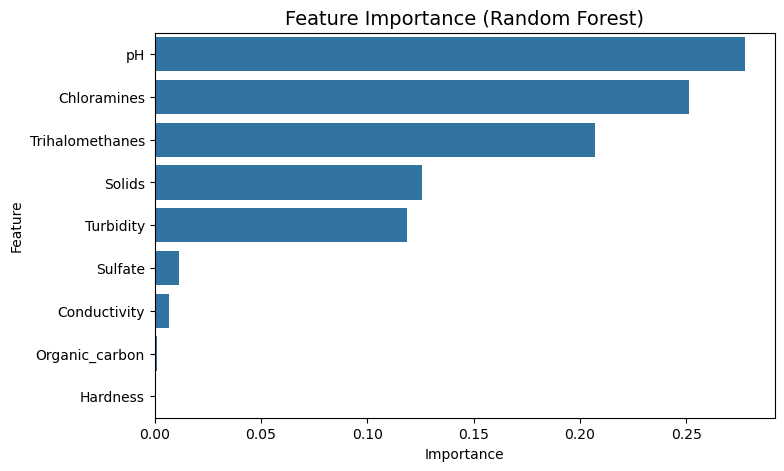

In [5]:
X = df_scaled.drop("Potability", axis=1)
y = df_scaled["Potability"]

# Method 1: SelectKBest (ANOVA F-test)
best_features = SelectKBest(score_func=f_classif, k="all")
fit = best_features.fit(X, y)
feature_scores = pd.DataFrame({
    "Feature": X.columns,
    "Score": fit.scores_
}).sort_values(by="Score", ascending=False)

print("\n--- Feature Scores (SelectKBest) ---")
print(feature_scores)

# Method 2: Feature Importance (RandomForest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n--- Feature Importance (RandomForest) ---")
print(importance)

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=importance)
plt.title("Feature Importance (Random Forest)", fontsize=14)
plt.show()